In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Do 40x10 runs, each with 50 var sources with fluxes that ramp up from 200 to 2000.

Each run has the same 50 var source fluxes.

Note that to be completely complete (i.e. detect nearly all 50 transients) we need to set a high `avoidAllOverlaps`.

In [ ]:
testResults1 = dit.multi.runMultiDiffimTestsVsTransientFlux(n_varSources=50, n_runs=48, 
                                                           templateNoNoise=True, skyLimited=True,
                                                           variablesAvoidBorder=3.5, avoidAllOverlaps=25.)

RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   35.5s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   40.8s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   38.2s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   37.3s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   38.2s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   38.7s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   41.3s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   41.4s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   42.0s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   40.3s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   44.8s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   43.5s


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  1.8min finished


RUNNING: 48
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   47.1s


In [ ]:
testResults2 = dit.multi.runMultiDiffimTestsVsTransientFlux(n_varSources=50, n_runs=48, 
                                                           templateNoNoise=False, skyLimited=True,
                                                           variablesAvoidBorder=3.5, avoidAllOverlaps=25.)

In [ ]:
testResults3 = dit.multi.runMultiDiffimTestsVsTransientFlux(n_varSources=50, n_runs=48, 
                                                           templateNoNoise=False, skyLimited=False,
                                                           variablesAvoidBorder=3.5, avoidAllOverlaps=25.)

In [ ]:
dit.dumpObjects((testResults1, testResults2, testResults3), "tmp33a_pkl")

In [ ]:
testResults1, testResults2, testResults3 = dit.loadObjects('tmp33a_pkl')

In [ ]:
dit.multi.plotResults(testResults1[20], title='Noise-free template; sky-limited');

In [ ]:
dit.multi.plotResults(testResults1[20], title='Noise-free template; sky-limited', asHist=True, doPrint=False);

In [ ]:
dit.multi.plotEfficiencyCurves(testResults1);

In [ ]:
dit.multi.plotEfficiencyCurves(testResults2);

In [ ]:
dit.multi.plotEfficiencyCurves(testResults3);

# OLD:

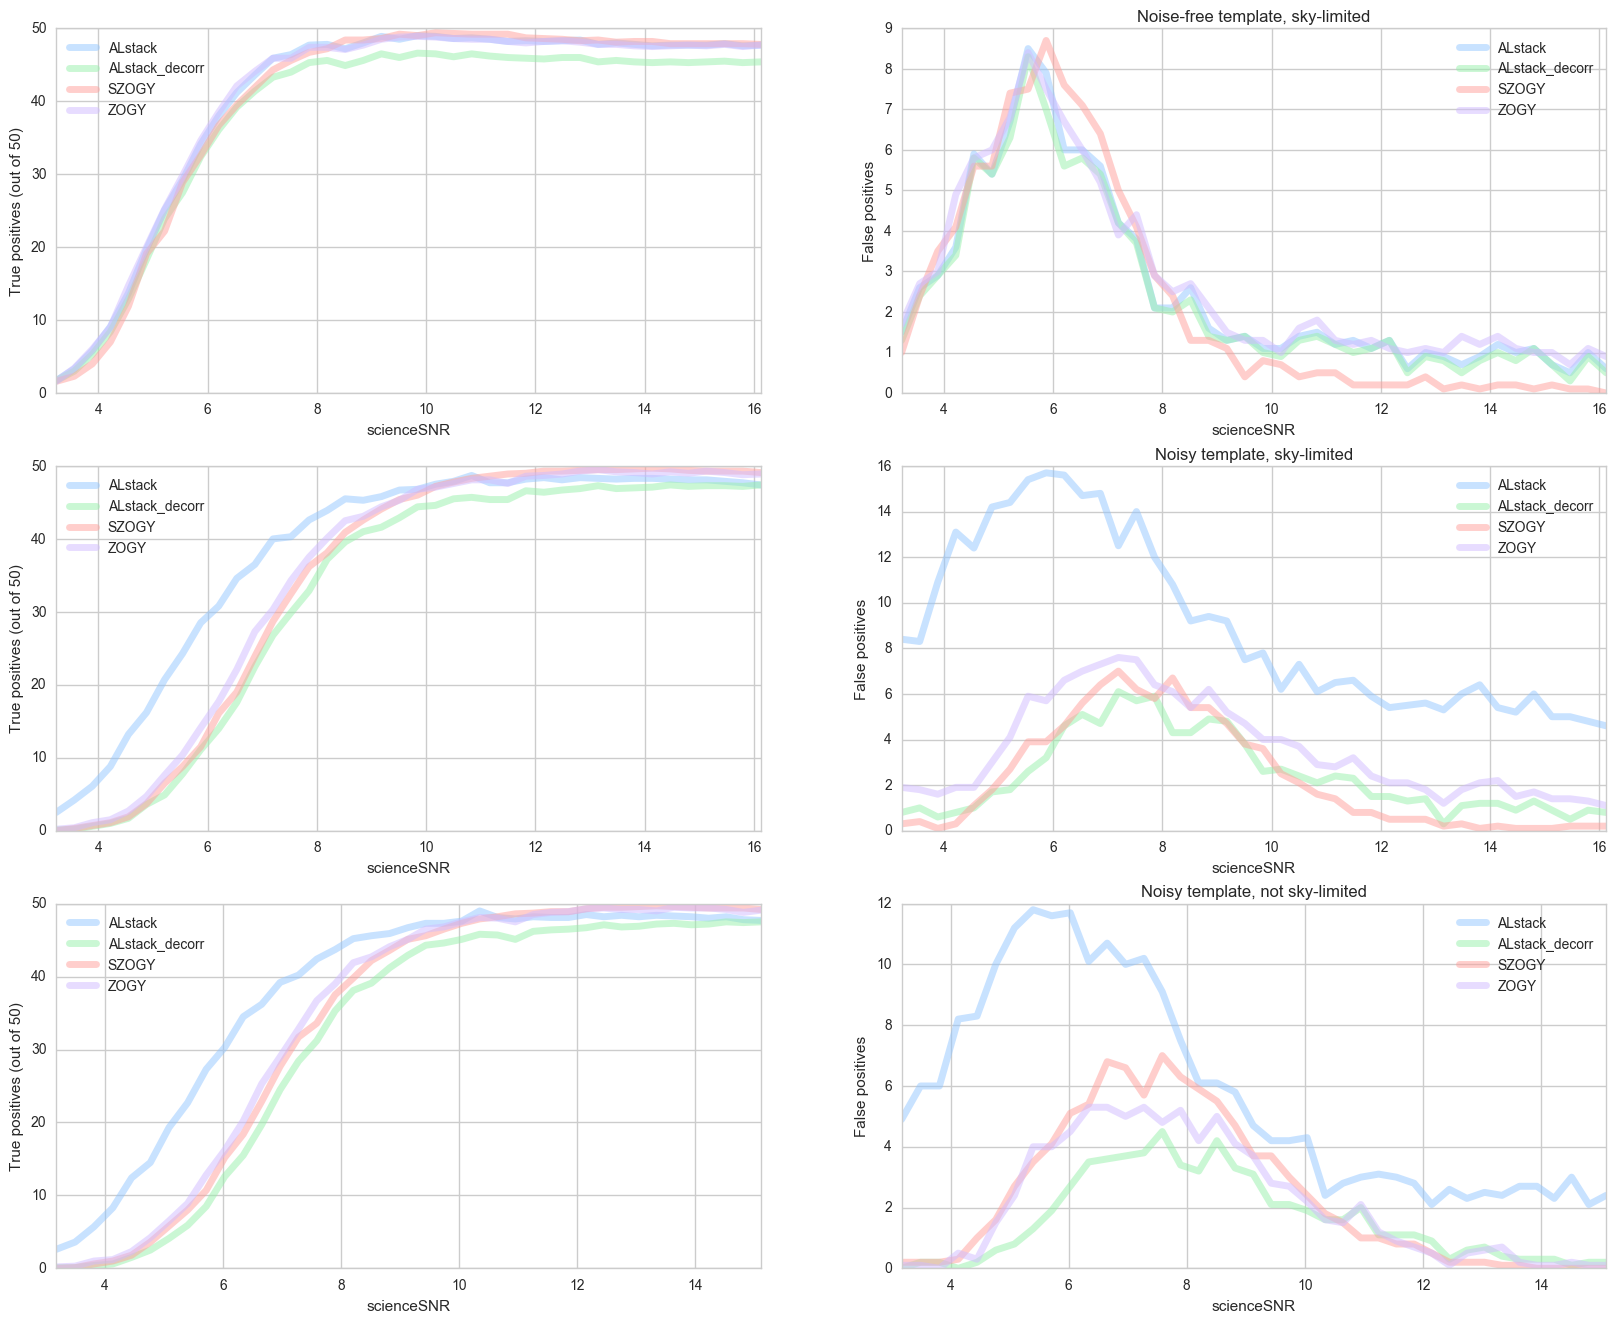

In [10]:
plt.subplots(3, 2, figsize=(20, 16))
ax = plt.subplot(321)    
TP1.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(322)    
FP1.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noise-free template, sky-limited')

ax = plt.subplot(323)    
TP2.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(324)    
FP2.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noisy template, sky-limited')

ax = plt.subplot(325)    
TP3.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax = plt.subplot(326)    
FP3.plot(x='scienceSNR', alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Noisy template, not sky-limited')

Calculate precision and recall:
    
https://en.wikipedia.org/wiki/Precision_and_recall

(0, 1)

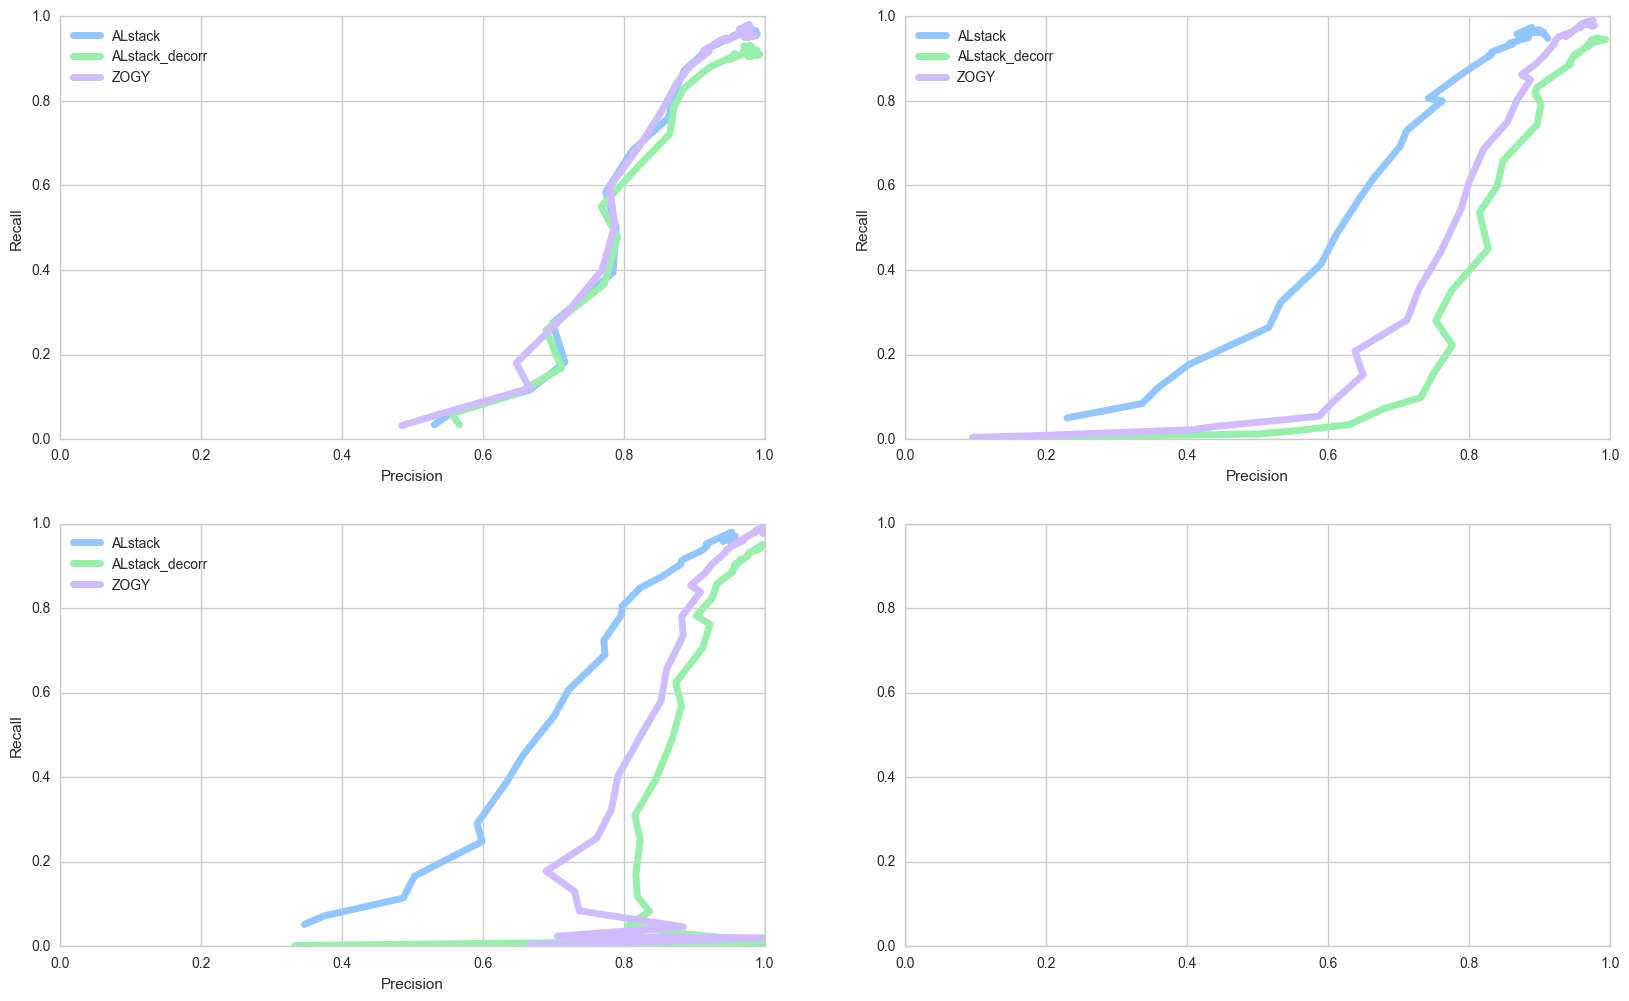

In [40]:
plt.subplots(2, 2, figsize=(20, 12))

precision1 = TP1.copy()
precision1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP1[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall1 = TP1.copy()
recall1[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(221)    
plt.plot(precision1.ALstack, recall1.ALstack, lw=5, label='ALstack')
plt.plot(precision1.ALstack_decorr, recall1.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision1.ZOGY, recall1.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)

precision2 = TP2.copy()
precision2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP2[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall2 = TP2.copy()
recall2[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(222)    
plt.plot(precision2.ALstack, recall2.ALstack, lw=5, label='ALstack')
plt.plot(precision2.ALstack_decorr, recall2.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision2.ZOGY, recall2.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)

precision3 = TP3.copy()
precision3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= \
    (TP3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] + FP3[['ALstack','ALstack_decorr','SZOGY','ZOGY']])
recall3 = TP3.copy()
recall3[['ALstack','ALstack_decorr','SZOGY','ZOGY']] /= 50.
ax = plt.subplot(223)    
plt.plot(precision3.ALstack, recall3.ALstack, lw=5, label='ALstack')
plt.plot(precision3.ALstack_decorr, recall3.ALstack_decorr, color='g', lw=5, label='ALstack_decorr')
plt.plot(precision3.ZOGY, recall3.ZOGY, color='m', lw=5, label='ZOGY')
plt.legend(loc='upper left')
plt.xlabel('Precision'); plt.ylabel('Recall')
plt.xlim(0, 1); plt.ylim(0, 1)